# **Regularization Techniques**

In [ ]:
!pip install tensorflow matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import numpy as np

In [ ]:
# Generate synthetic data for demonstration
def generate_data():
    np.random.seed(0)
    X = np.random.randn(1000, 20)
    weights = np.random.randn(20, 1) * (np.arange(20) % 2)
    y = X.dot(weights) + np.random.randn(1000, 1) * 0.1
    return X, y

In [ ]:
X, y = generate_data()

# **L1/L2 Regularization**

Epoch 1/50
25/25 [==============================] - 1s 16ms/step - loss: 10.1119 - val_loss: 8.4763
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 8.2438 - val_loss: 7.1966
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 7.2594 - val_loss: 6.7030
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 6.9320 - val_loss: 6.4614
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 6.6907 - val_loss: 6.2386
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 6.4746 - val_loss: 6.0328
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 6.2743 - val_loss: 5.8417
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 6.0814 - val_loss: 5.6465
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 5.9004 - val_loss: 5.4696
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 5.7307 - val_loss: 5.3026
Epoch 11/50
25/25

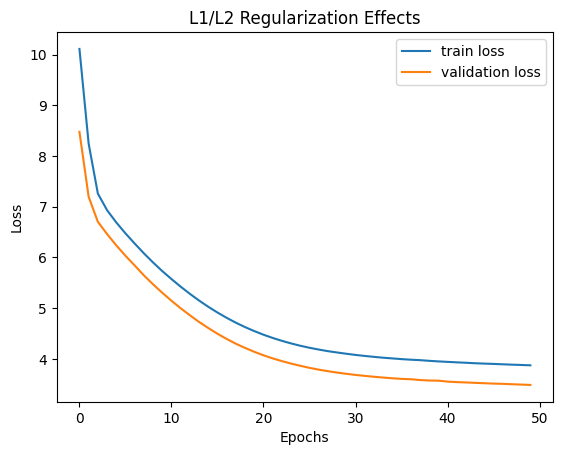

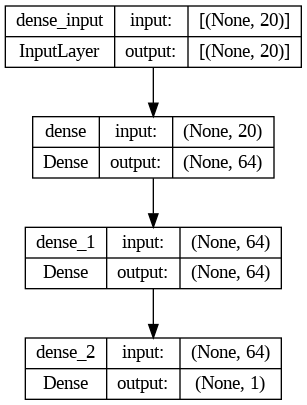

In [ ]:
# Define a model with L1/L2 regularization
def build_model(l1_reg=0.01, l2_reg=0.01):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],),
              kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
        Dense(1)
    ])
    return model

model = build_model(l1_reg=0.005, l2_reg=0.005)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Setup TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model
history = model.fit(X, y, epochs=50, validation_split=0.2, callbacks=[tensorboard_callback])

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('L1/L2 Regularization Effects')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#display the model architecture
plot_model(model, show_shapes=True, to_file='model.png')

# **Dropout**

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 7.2315 - val_loss: 5.5876
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 5.8432 - val_loss: 4.6560
Epoch 3/50
25/25 [==============================] - 0s 14ms/step - loss: 5.0101 - val_loss: 3.8758
Epoch 4/50
25/25 [==============================] - 0s 13ms/step - loss: 4.4875 - val_loss: 3.5556
Epoch 5/50
25/25 [==============================] - 0s 14ms/step - loss: 4.3783 - val_loss: 3.4995
Epoch 6/50
25/25 [==============================] - 0s 18ms/step - loss: 4.3175 - val_loss: 3.4478
Epoch 7/50
25/25 [==============================] - 0s 12ms/step - loss: 4.2385 - val_loss: 3.4184
Epoch 8/50
25/25 [==============================] - 0s 11ms/step - loss: 4.1803 - val_loss: 3.4179
Epoch 9/50
25/25 [==============================] - 0s 16ms/step - loss: 4.1809 - val_loss: 3.3904
Epoch 10/50
25/25 [==============================] - 0s 12ms/step - loss: 4.1363 - val_loss: 3.3914
Epoch 11/5

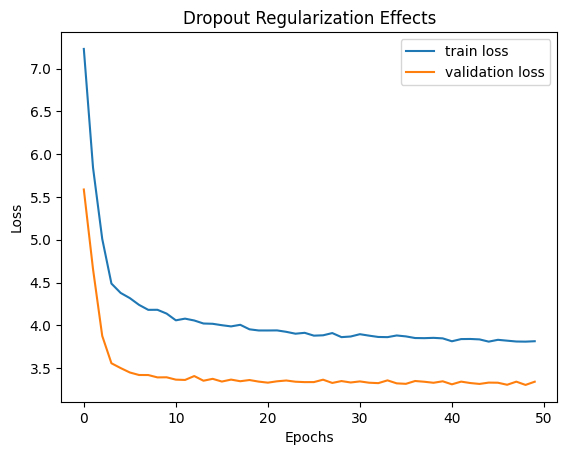

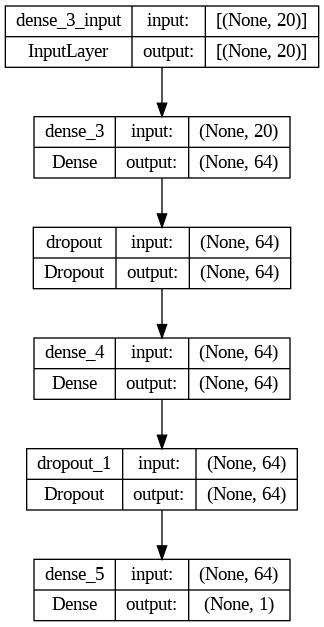

In [ ]:
# Define a model with Dropout regularization
def build_model_with_dropout(dropout_rate=0.5):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])
    return model

model = build_model_with_dropout(dropout_rate=0.3)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Setup TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs_dropout', histogram_freq=1)

# Train the model
history = model.fit(X, y, epochs=50, validation_split=0.2, callbacks=[tensorboard_callback])

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Dropout Regularization Effects')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# show the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model_with_dropout.png')

# **Monte Carlo Dropout**

Epoch 1/50
25/25 [==============================] - 1s 16ms/step - loss: 7.1547 - val_loss: 5.6209
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 6.0352 - val_loss: 4.6030
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 5.1440 - val_loss: 3.9360
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 4.6370 - val_loss: 3.6034
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 4.4713 - val_loss: 3.5012
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 4.3599 - val_loss: 3.4730
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 4.3542 - val_loss: 3.4296
Epoch 8/50
25/25 [==============================] - 0s 8ms/step - loss: 4.2681 - val_loss: 3.4349
Epoch 9/50
25/25 [==============================] - 0s 8ms/step - loss: 4.1802 - val_loss: 3.3941
Epoch 10/50
25/25 [==============================] - 0s 9ms/step - loss: 4.1622 - val_loss: 3.3764
Epoch 11/50
25/25 

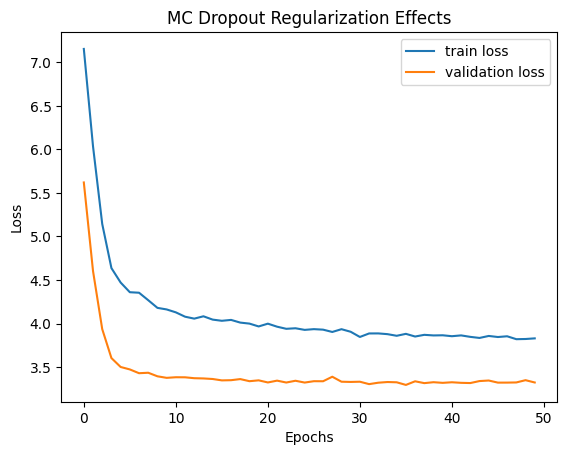

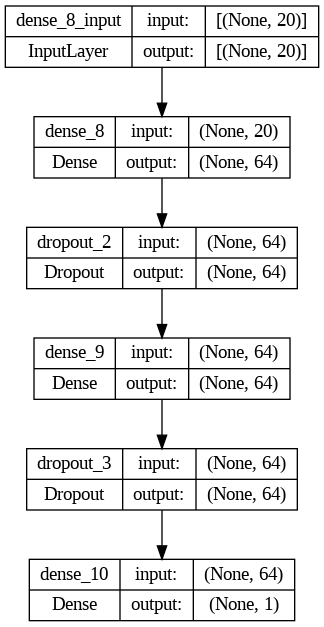

In [ ]:


# Define the model with dropout
def build_mc_dropout_model(dropout_rate=0.3):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])
    return model

model = build_mc_dropout_model(dropout_rate=0.3)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Setup TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs_mc_dropout', histogram_freq=1)

# Train the model
history = model.fit(X, y, epochs=50, validation_split=0.2, callbacks=[tensorboard_callback])

# Function to perform MC Dropout inference
def mc_dropout_predict(model, X, n_samples=100):
    predictions = []
    for _ in range(n_samples):
        # Use model.predict with training=True to enable Dropout during inference
        y_pred = model(X, training=True)
        predictions.append(y_pred)
    predictions = np.array(predictions)
    return np.mean(predictions, axis=0), np.std(predictions, axis=0)

# Using MC Dropout at inference
mean_predictions, std_predictions = mc_dropout_predict(model, X[:5])

# Visualize results
print("Mean Predictions:\n", mean_predictions)
print("Standard Deviations of Predictions:\n", std_predictions)

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('MC Dropout Regularization Effects')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model_with_mc_dropout.png')



# **Early Stopping**

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 6.4754 - val_loss: 5.2804
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 5.0029 - val_loss: 4.0674
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 4.0666 - val_loss: 3.5490
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 3.8420 - val_loss: 3.4566
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 3.7866 - val_loss: 3.4167
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 3.7520 - val_loss: 3.3915
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 3.7259 - val_loss: 3.3750
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 3.7098 - val_loss: 3.3609
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 3.6972 - val_loss: 3.3547
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 3.6899 - val_loss: 3.3469
Epoch 11

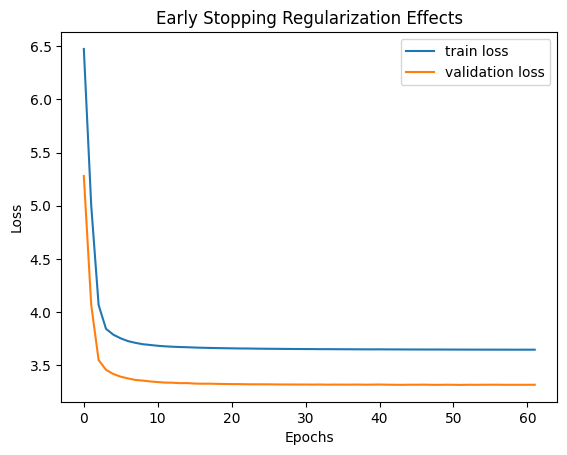

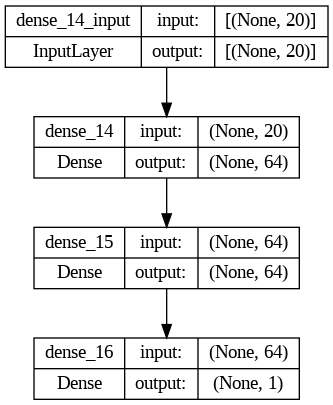

In [ ]:


# Define the model
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    return model

model = build_model()

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Setup TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs_early_stopping', histogram_freq=1)

# Setup Early Stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X, y, epochs=100, validation_split=0.2, callbacks=[tensorboard_callback, early_stopping_callback])

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Early Stopping Regularization Effects')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# display the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model_early_stopping.png')


# **Custom Regularization**

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 12.3088 - val_loss: 10.7148
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 10.3313 - val_loss: 9.2894
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 9.2673 - val_loss: 8.6227
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 8.7383 - val_loss: 8.1390
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 8.2745 - val_loss: 7.6822
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 7.8297 - val_loss: 7.2481
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 7.4071 - val_loss: 6.8348
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 7.0075 - val_loss: 6.4494
Epoch 9/50
25/25 [==============================] - 0s 6ms/step - loss: 6.6408 - val_loss: 6.0972
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 6.3073 - val_loss: 5.7800
Epoch 11/50
25/

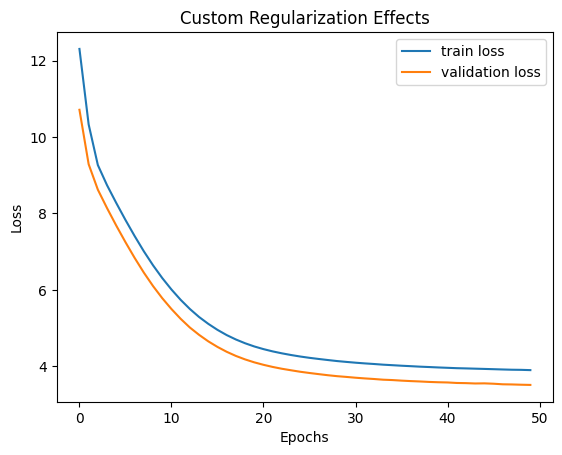

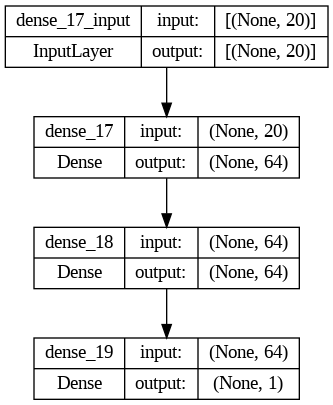

In [ ]:

from tensorflow.keras.regularizers import Regularizer


# Define a custom regularization class
class CustomRegularizer(Regularizer):
    def __init__(self, strength):
        self.strength = strength

    def __call__(self, x):
        return self.strength * tf.reduce_sum(tf.abs(x))

    def get_config(self):
        return {'strength': self.strength}

# Define the model with custom regularization
def build_model_with_custom_regularization(regularization_strength=0.01):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=CustomRegularizer(regularization_strength)),
        Dense(64, activation='relu', kernel_regularizer=CustomRegularizer(regularization_strength)),
        Dense(1)
    ])
    return model

model = build_model_with_custom_regularization(regularization_strength=0.01)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Setup TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs_custom_regularization', histogram_freq=1)

# Train the model
history = model.fit(X, y, epochs=50, validation_split=0.2, callbacks=[tensorboard_callback])

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Custom Regularization Effects')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model_custom_regularization.png')
